In [29]:
from sklearn import datasets
digits = datasets.load_digits()

In [33]:
import pandas as pd
digits1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

In [37]:
print(digits.key)

AttributeError: key

In [38]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [39]:
print(digits.data)
print(digits.target)
print(digits.DESCR)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 4

In [40]:
print(digits.keys)

<built-in method keys of Bunch object at 0x0000000009D1EE08>


In [41]:
digits.data.shape

(1797, 64)

In [42]:
digits.target.shape

(1797,)

In [43]:
digits.DESCR.shape

AttributeError: 'str' object has no attribute 'shape'

In [44]:
digits.images.shape

(1797, 8, 8)

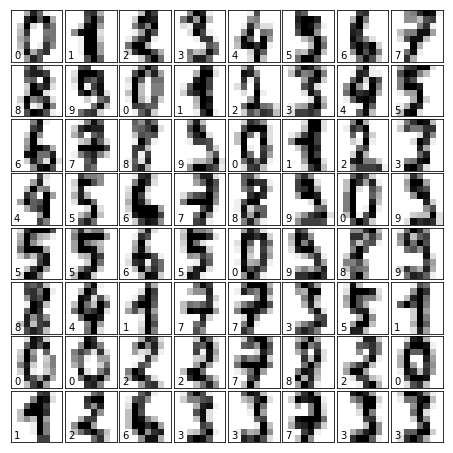

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))
plt.show()

In [59]:
randomized_pca = RandomizedPCA(n_components=2)

NameError: name 'RandomizedPCA' is not defined

In [61]:
from sklearn.decomposition import RandomizedPCA
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

C:\Users\kuki\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)

In [63]:
reduced_data_rpca.shape

(1797, 2)

In [64]:
reduced_data_pca.shape

(1797, 2)

In [65]:
reduced_data_rpca

array([[ -1.26254173,  21.28059263],
       [  7.96744454, -20.75291411],
       [  7.004382  ,  -9.94986298],
       ..., 
       [ 10.82347549,  -6.95569626],
       [ -4.91531348,  12.41010379],
       [ -0.3324658 ,   6.3538108 ]])

In [66]:
reduced_data_pca

array([[ -1.2594673 ,  21.2748771 ],
       [  7.95761158, -20.76870818],
       [  6.99192351,  -9.95597825],
       ..., 
       [ 10.80128326,  -6.96024523],
       [ -4.87209745,  12.42395195],
       [ -0.34439012,   6.36556544]])

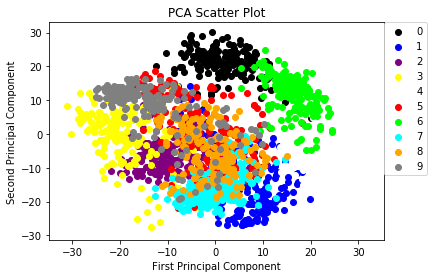

In [78]:
colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:,0][digits.target == i] 
    y = reduced_data_rpca[:,1][digits.target == i]
    plt.scatter(x,y,c=colors[i])
plt.legend(digits.target_names,bbox_to_anchor=(1,1),loc=2,borderaxespad=0)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

In [79]:
from sklearn.preprocessing import scale
data = scale(digits.data)

In [80]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test,images_train,images_test = train_test_split(data,digits.target,digits.images,test_size=0.25,random_state=42)

C:\Users\kuki\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
n_samples,n_features = X_train.shape

In [82]:
n_samples

1347

In [83]:
n_features

64

In [84]:
n_digits = len(np.unique(y_train))

In [85]:
n_digits

10

In [96]:
from sklearn import cluster
clf = cluster.KMeans(init = 'k-means++',n_clusters = 10,random_state=42)
clf.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

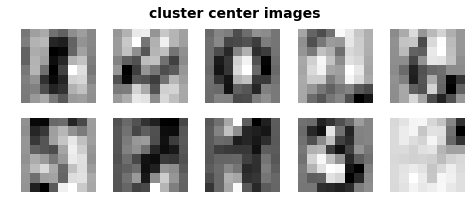

In [97]:
fig = plt.figure(figsize=(8,3))
fig.suptitle('cluster center images',fontsize=14,fontweight='bold')
for i in range(10):
    ax = fig.add_subplot(2,5,1+i)
    ax.imshow(clf.cluster_centers_[i].reshape((8,8)),cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

In [98]:
y_pred = clf.predict(X_test)

In [99]:
y_pred[:100]

array([4, 8, 8, 9, 3, 3, 5, 8, 5, 3, 0, 7, 1, 2, 1, 3, 8, 6, 8, 8, 1, 5, 8,
       6, 5, 4, 8, 5, 4, 8, 1, 8, 3, 1, 1, 4, 8, 1, 6, 4, 4, 8, 0, 8, 4, 7,
       8, 2, 4, 5, 5, 0, 8, 5, 4, 2, 8, 2, 2, 7, 2, 1, 5, 3, 1, 5, 6, 2, 6,
       8, 8, 8, 8, 6, 6, 2, 1, 5, 8, 8, 8, 2, 3, 8, 8, 2, 4, 1, 1, 8, 0, 3,
       7, 8, 8, 3, 8, 2, 1, 1])

In [100]:
y_test[:100]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9,
       7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1,
       3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7,
       5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2,
       8, 3, 5, 2, 9, 0, 4, 4])

In [94]:
clf.cluster_centers.shape

AttributeError: 'KMeans' object has no attribute 'cluster_centers'

In [95]:
clf.cluster_centers_.shape

(10, 64)

In [101]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [102]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.674    0.146


In [103]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

# Import GridSearchCV
from sklearn.grid_search import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

C:\Users\kuki\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score for training data: 0.9844097995545658
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001
